In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Read the data from file and load it into a dataframe

In [ ]:
df=pd.read_csv('sales_data.csv')

In [ ]:
df.shape

(550068, 12)

In [ ]:
df.values

array([[1000001, 'P00069042', 'F', ..., nan, nan, 8370],
       [1000001, 'P00248942', 'F', ..., 6.0, 14.0, 15200],
       [1000001, 'P00087842', 'F', ..., nan, nan, 1422],
       ...,
       [1006036, 'P00375436', 'F', ..., nan, nan, 137],
       [1006038, 'P00375436', 'F', ..., nan, nan, 365],
       [1006039, 'P00371644', 'F', ..., nan, nan, 490]], dtype=object)

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,15.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,15.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
144520,1004285,P00166142,M,40.0,0.0,B,3,0.0,5.0,NaN,NaN,7036.0
144521,1004285,P00046742,M,40.0,0.0,B,3,0.0,1.0,2.0,15.0,15465.0
144522,1004285,P00045142,M,40.0,0.0,B,3,0.0,1.0,2.0,6.0,8165.0
144523,1004285,P00053142,M,40.0,0.0,B,3,0.0,1.0,NaN,NaN,7865.0


## 2. Print the statistical properties.


In [ ]:
df.describe()

,User_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.445250e+05,144524.000000,144524.000000,144524.000000,144524.000000,99639.000000,44204.000000,144524.000000
mean,1.002852e+06,34.189789,8.100516,0.407351,5.296062,9.856121,12.665754,9307.982916
std,3.105821e+03,11.066329,6.534483,0.491343,3.747138,5.087006,4.119372,4985.004455
min,1.004200e+04,15.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001409e+06,30.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5845.000000
50%,1.002863e+06,30.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8052.500000
75%,1.004162e+06,40.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12064.000000
max,1.006040e+06,60.000000,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


## 3. Print the Data types of different fields.

In [ ]:
print(df.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


##4. Print the first and last 5 records.


In [ ]:
print(df.head(5))
print(df.tail(5))

   User_ID Product_ID Gender  ...  Product_Category_2  Product_Category_3 Purchase
0  1000001  P00069042      F  ...                 NaN                 NaN   8370.0
1  1000001  P00248942      F  ...                 6.0                14.0  15200.0
2  1000001  P00087842      F  ...                 NaN                 NaN   1422.0
3  1000001  P00085442      F  ...                14.0                 NaN   1057.0
4  1000002  P00285442      M  ...                 NaN                 NaN   7969.0

[5 rows x 12 columns]
        User_ID Product_ID  ... Product_Category_3  Purchase
144520  1004285  P00166142  ...                NaN    7036.0
144521  1004285  P00046742  ...               15.0   15465.0
144522  1004285  P00045142  ...                6.0    8165.0
144523  1004285  P00053142  ...                NaN    7865.0
144524    10042        NaN  ...                NaN       NaN

[5 rows x 12 columns]


## 5. Check whether there are any null values

In [ ]:
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

## 6. Print the number of null values in each column, in the dataframe.

In [ ]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Use countplot in seabon library to plot the number of male and female customers.

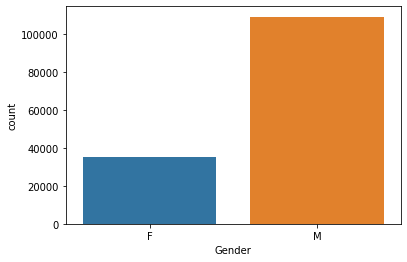

In [ ]:
sns.countplot(x="Gender",data=df)

## . Print the number of customers who bought something from the store

In [ ]:
print(len(df[df['Purchase']>0]))

550068


In [ ]:
print(df.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [ ]:
df.Purchase.unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

## 9. Drop the column product_category_3.


In [ ]:
df['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64

In [ ]:
df.drop('Product_Category_3', axis=1, inplace=True)

## 10. Fill the missing values in the column Product_Category_2, with the mean value of the column.


In [ ]:
mean_value=df['Product_Category_2'].mean()
df['Product_Category_2'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
        User_ID Product_ID  ... Product_Category_2  Purchase
0       1000001  P00069042  ...           9.842329      8370
1       1000001  P00248942  ...           6.000000     15200
2       1000001  P00087842  ...           9.842329      1422
3       1000001  P00085442  ...          14.000000      1057
4       1000002  P00285442  ...           9.842329      7969
...         ...        ...  ...                ...       ...
550063  1006033  P00372445  ...           9.842329       368
550064  1006035  P00375436  ...           9.842329       371
550065  1006036  P00375436  ...           9.842329       137
550066  1006038  P00375436  ...           9.842329       365
550067  1006039  P00371644  ...           9.842329       490

[550068 rows x 11 columns]


## 11. Drop User_ID and Product_ID, since these columns are not helping in prediction

In [ ]:
df.drop(['User_ID','Product_ID'], axis = 1,inplace=True)

KeyError: ignored

## 12. Draw a heatmap using seaborn library, that contains correlation coefficient of different features.


                    User_ID   Age  ...  Product_Category_3  Purchase
User_ID                1.00  0.04  ...                0.00      0.00
Age                    0.04  1.00  ...                0.06      0.02
Occupation            -0.02  0.10  ...                0.01      0.02
Marital_Status         0.02  0.31  ...                0.02     -0.00
Product_Category_1     0.00  0.06  ...                0.23     -0.34
Product_Category_2     0.00  0.05  ...                0.54     -0.18
Product_Category_3     0.00  0.06  ...                1.00     -0.02
Purchase               0.00  0.02  ...               -0.02      1.00

[8 rows x 8 columns]


Text(110.59375, 0.5, '')

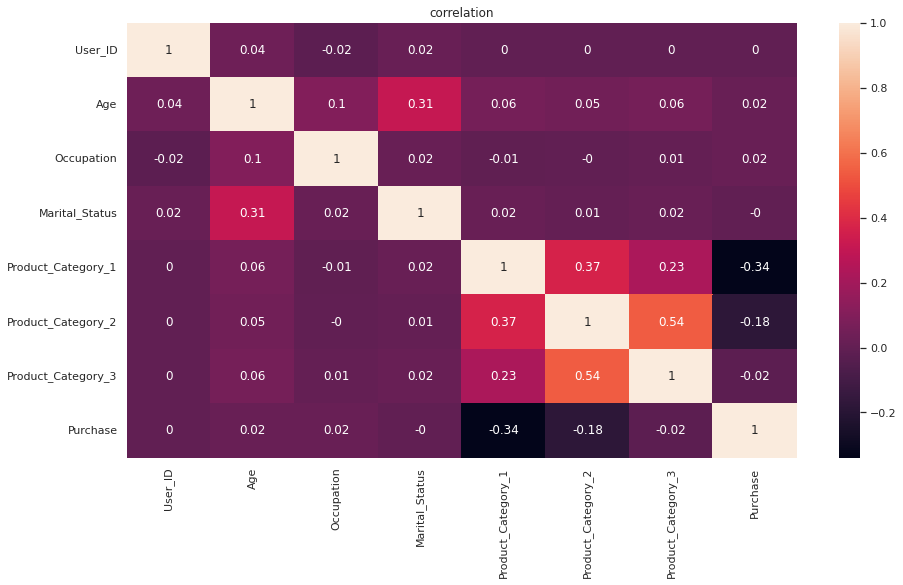

In [ ]:
correlation=df.corr().round(2)
sns.set(rc={'figure.figsize':(15,8)})
print (correlation)
fig1=sns.heatmap(correlation,annot=True)
fig1.set_title('correlation')
fig1.set_ylabel(None)

## 13. Divide the data into training ang testing set, 70% of data should be training and 30% test.

In [ ]:
X1= pd.DataFrame([df['Product_Category_1'],df['Occupation']])
Y1 =df['Age']
#print(X1.shape)
#print(Y1.shape)
X1_new=X1.to_numpy()
Y1_new=Y1.to_numpy()
print(X1_new.shape)
print(Y1_new.shape)

X1=X1.transpose()
Y1=Y1.transpose()

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2, 550068)
(550068,)
(385047, 2)
(165021, 2)
(385047,)
(165021,)


## 14. Build a linear regression model using training data.

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## 15. Print all the coefficients of linear regression


In [ ]:
print(lin_model.coef_)
#print(lin_model.intercept_)

[0.17170103 0.16499015]


## 16. Use the test data to predict the Purchase value


[35.16853672 35.30668338 36.6534481  ... 35.96664399 34.38385121
 35.31339425]


Text(0, 0.5, 'predicted Purchase value')

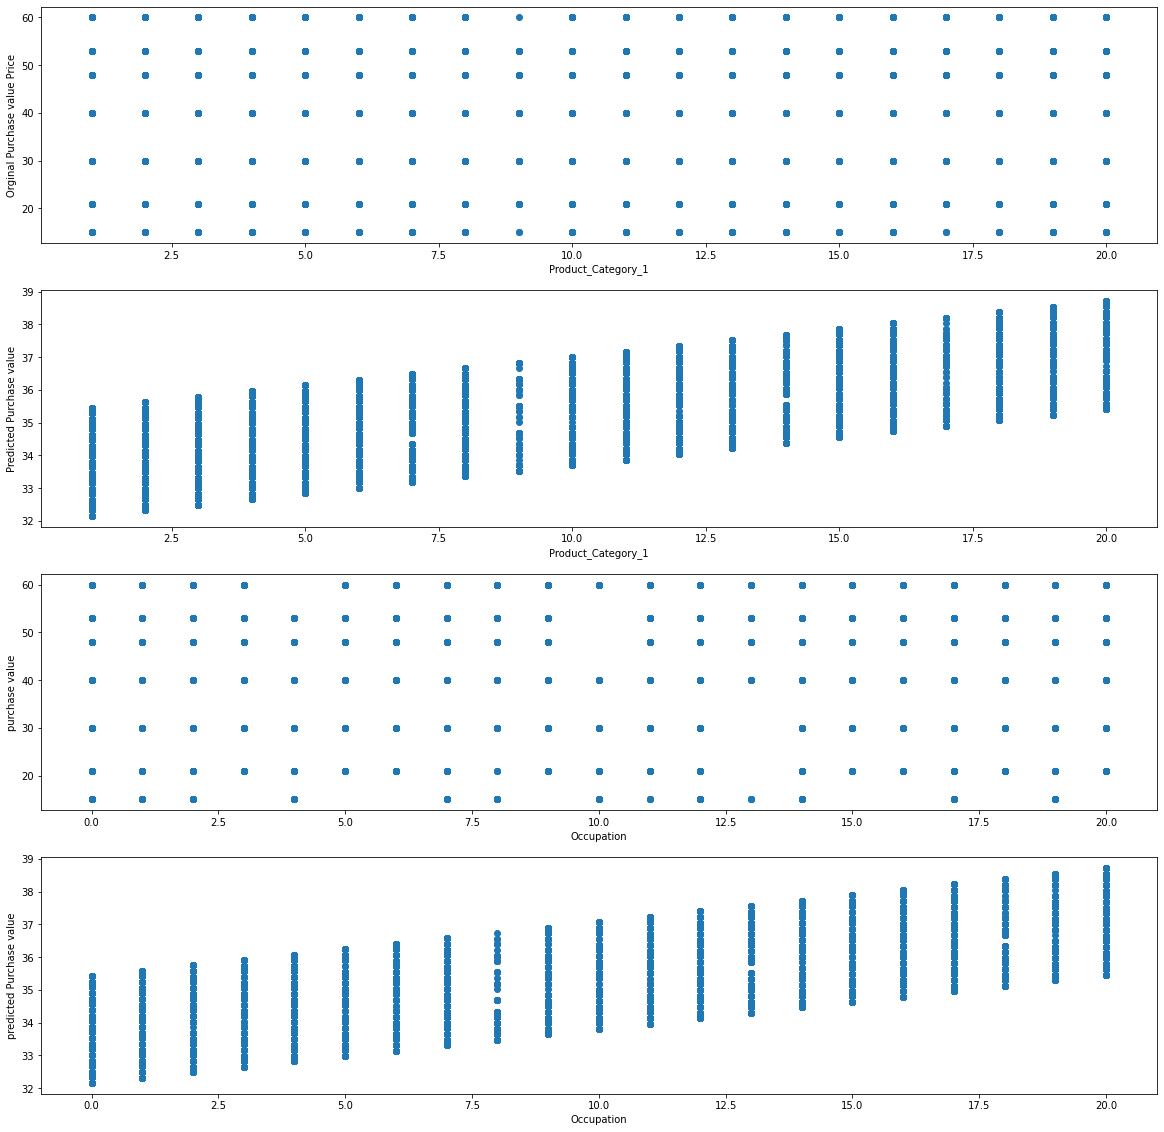

In [ ]:
Y_predict=lin_model.predict(X_test)
print(Y_predict)

# To PLOT THE DIFFERENCE BETWEEN ORIGINAL AND THE PREDICTED PURCHASE VALUE

import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, figsize=(20, 20))

# original price
ax[0].scatter(x = X_test['Product_Category_1'], y = Y_test)
ax[0].set_xlabel("Product_Category_1")
ax[0].set_ylabel("Orginal Purchase value Price")

# predicted price
ax[1].scatter(x = X_test['Product_Category_1'], y = Y_predict)
ax[1].set_xlabel("Product_Category_1")
ax[1].set_ylabel("Predicted Purchase value")

# original price
ax[2].scatter(x = X_test['Occupation'], y = Y_test)
ax[2].set_xlabel("Occupation")
ax[2].set_ylabel("purchase value")

# predicted price
ax[3].scatter(x = X_test['Occupation'], y = Y_predict)
ax[3].set_xlabel("Occupation")
ax[3].set_ylabel("predicted Purchase value")

## 17. Print Root mean square error of the model.

In [ ]:
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
print('RMSE is {}'.format(rmse))

RMSE is 10.974258923023468


 **Model Not Good For Prediction**